<a href="https://colab.research.google.com/github/johanjun/Google_Machine_Learning_Bootcamp_KR_2021/blob/main/kaggle/RSNA_MICCAI_BRAIN_TUMOR/1013_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 7.9 MB/s 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm import tqdm
import random
import pydicom
import cv2
import pickle

import matplotlib.pyplot as plt
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
data_dir = '/content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai/'

In [4]:
train_df = pd.read_csv(data_dir + "train_labels.csv")
test_df = pd.read_csv(data_dir + "sample_submission.csv")

In [5]:
#refer: https://www.kaggle.com/arnabs007/part-1-rsna-miccai-btrc-understanding-the-data
EXCLUDE = [109, 123, 709]
train_df = train_df[~train_df.BraTS21ID.isin(EXCLUDE)]

In [6]:
TYPES = ["FLAIR", "T1w", "T1wCE", "T2w"] #mpMRI scans

In [46]:
def load_dicom(path, size = 128): #load DICOM files
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array #returns a numpy.ndarray containing the pixel data
    if np.max(data) != 0:
        data = data / np.max(data) #standardizes so that the pixel values are between 0 and 1
    data = (data * 255).astype(np.uint8) #rescales to 0 and 255
    return cv2.resize(data, (size, size))

In [8]:
def get_all_image_paths(BraTS21ID, image_type, folder="train"): #get an array of all the images of a particular type or a particular patient id
    assert(image_type in TYPES) #only in types
    patient_path = os.path.join(data_dir + "%s/" % folder, str(BraTS21ID).zfill(5)) #다른 폴더일 수도 있음
    #print(lambda x: int(x[:-4].split("-")[-1]))
    
    paths = sorted(glob.glob(os.path.join(patient_path, image_type, "*")), key=lambda x: int(x[:-4].split("-")[-1])) #sort
    #print(paths)
    
    num_images = len(paths)
    
    start = int(num_images * 0.25)
    end = int(num_images * 0.75)
    if num_images < 10:
        jump = 1
    else:
        jump = 3
        
    return np.array(paths[start:end:jump])

In [9]:
def get_all_images(BraTS21ID, image_type, folder="train", size=225):
    return [load_dicom(path, size) for path in get_all_image_paths(BraTS21ID, image_type, folder)]

In [10]:
def get_all_data_train(image_type):
    global train_df
    
    X = []
    y = []
    train_ids = []

    for i in tqdm(train_df.index):
        tmp_x = train_df.loc[i]
        images = get_all_images(int(tmp_x["BraTS21ID"]), image_type, "train", IMAGE_SIZE)
        label = tmp_x["MGMT_value"]

        X += images
        y += [label] * len(images)
        train_ids += [int(tmp_x["BraTS21ID"])] * len(images)
        assert(len(X) == len(y))
    return np.array(X), np.array(y), np.array(train_ids)

def get_all_data_test(image_type):
    global test_df
    
    X = []
    test_ids = []

    for i in tqdm(test_df.index):
        tmp_x = test_df.loc[i]
        images = get_all_images(int(tmp_x["BraTS21ID"]), image_type, "test", IMAGE_SIZE)
        X += images
        test_ids += [int(tmp_x["BraTS21ID"])] * len(images)

    return np.array(X), np.array(test_ids)

In [20]:
#pickling
with open(data_dir+'X_T1wCE.pkl', 'rb') as f:
  X_T1wCE = pickle.load(f)

with open(data_dir+'y_T1wCE.pkl', 'rb') as f:
  y_T1wCE = pickle.load(f)

with open(data_dir+'train_idt_T1wCE.pkl', 'rb') as f:
  train_idt_T1wCE = pickle.load(f)

with open(data_dir+'X_test_T1wCE.pkl', 'rb') as f:
  X_test_T1wCE = pickle.load(f)

with open(data_dir+'test_idt_T1wCE.pkl', 'rb') as f:
  test_idt_T1wCE = pickle.load(f)
#pickling
with open(data_dir+'X_FLAIR.pkl', 'rb') as f:
  X_FLAIR = pickle.load(f)

with open(data_dir+'y_FLAIR.pkl', 'rb') as f:
  y_FLAIR = pickle.load(f)

with open(data_dir+'train_idt_FLAIR.pkl', 'rb') as f:
  train_idt_FLAIR = pickle.load(f)

with open(data_dir+'X_test_FLAIR.pkl', 'rb') as f:
  X_test_FLAIR = pickle.load(f)

with open(data_dir+'test_idt_FLAIR.pkl', 'rb') as f:
  test_idt_FLAIR = pickle.load(f)
#pickling
with open(data_dir+'X_T2w.pkl', 'rb') as f:
  X_T2w = pickle.load(f)

with open(data_dir+'y_T2w.pkl', 'rb') as f:
  y_T2w = pickle.load(f)

with open(data_dir+'train_idt_T2w.pkl', 'rb') as f:
  train_idt_T2w = pickle.load(f)

with open(data_dir+'X_test_T2w.pkl', 'rb') as f:
  X_test_T2w = pickle.load(f)

with open(data_dir+'test_idt_T2w.pkl', 'rb') as f:
  test_idt_T2w = pickle.load(f)
#pickling
with open(data_dir+'X_T1w.pkl', 'rb') as f:
  X_T1w = pickle.load(f)

with open(data_dir+'y_T1w.pkl', 'rb') as f:
  y_T1w = pickle.load(f)

with open(data_dir+'train_idt_T1w.pkl', 'rb') as f:
  train_idt_T1w = pickle.load(f)

with open(data_dir+'X_test_T1w.pkl', 'rb') as f:
  X_test_T1w = pickle.load(f)

with open(data_dir+'test_idt_T1w.pkl', 'rb') as f:
  test_idt_T1w = pickle.load(f)

In [22]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [32]:
X_T1w[400].shape

(64, 64)

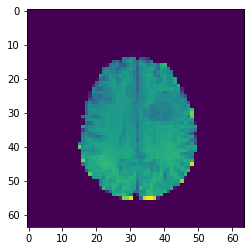

In [24]:
plt.imshow(X_T1w[400], interpolation='nearest')
plt.show()

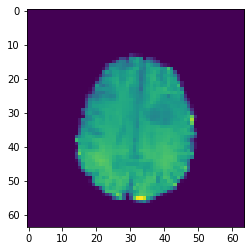

In [40]:
X_T1w_400_exp = tf.expand_dims(X_T1w[400], -1)
augmented_image = data_augmentation(X_T1w_400_exp)
augmented_image = tf.squeeze(augmented_image)
plt.imshow(augmented_image, interpolation='nearest')
plt.show()

In [ ]:
img_dim, img_ch = tf.shape(X_T1w)[-3:], tf.shape(X_T1w)[-1]

In [ ]:
img_dim, img_ch

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([13004,    64,    64], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=64>)

In [ ]:
stacked_imgs = X_T1w

In [ ]:
stacked_imgs.shape

(13004, 64, 64)

In [ ]:
tf.shape(stacked_imgs)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=13004>

In [ ]:
rand_factor = tf.random.uniform([], minval=0.8, maxval=1.)
crop_shape = tf.cast(tf.cast(img_dim, tf.float32) * rand_factor, tf.int32)
# crop_shape = tf.concat([crop_shape, tf.shape(stacked_imgs)[-1]], axis=0)
crop_X_T1w = tf.image.random_crop(stacked_imgs, crop_shape)
crop_X_T1w.shape

TensorShape([11719, 57, 57])

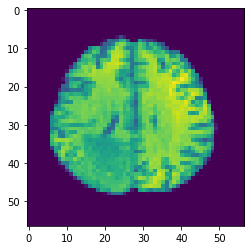

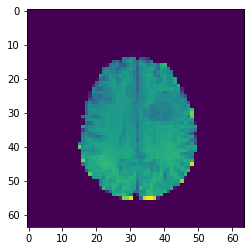

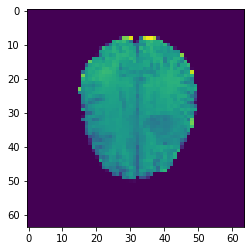

In [ ]:
plt.imshow(crop_X_T1w[400], interpolation='nearest')
plt.show()
plt.imshow(X_T1w[400], interpolation='nearest')
plt.show()
plt.imshow(reversed_X_T1w[400], interpolation='nearest')
plt.show()

In [47]:
IMAGE_SIZE = 128
train_df = train_df[:5]

X_T1wCE, y_T1wCE, train_idt_T1wCE = get_all_data_train("T1wCE")

100%|██████████| 5/5 [00:00<00:00,  6.09it/s]


In [48]:
X_T1wCE.shape

(110, 128, 128)

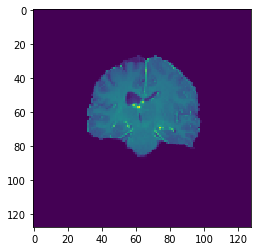

In [49]:
plt.imshow(X_T1wCE[30], interpolation='nearest')
plt.show()

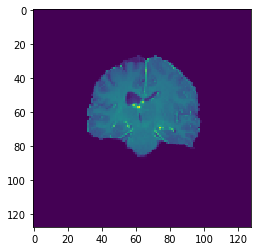

In [52]:
plt.imshow(X_T1wCE[30], interpolation='nearest')
plt.show()

In [50]:
from pydicom.pixel_data_handlers.util import apply_voi_lut

window_center = -600
window_width = 1600

def load_dicom(path, size = 64): #load DICOM files
    dicom = pydicom.read_file(path)
    s = int(dicom.RescaleSlope)
    b = int(dicom.RescaleIntercept)
    data = s * dicom.pixel_array + b

    dicom.WindowCenter = window_center
    dicom.WindowWidth = window_width

    data = apply_voi_lut(data, dicom)

    data = np.clip(data, window_center - (window_width / 2), window_center + (window_width / 2))

    data = dicom.pixel_array #returns a numpy.ndarray containing the pixel data
    if np.max(data) != 0:
        data = data / np.max(data) #standardizes so that the pixel values are between 0 and 1
    data = (data * 255).astype(np.uint8) #rescales to 0 and 255
    return cv2.resize(data, (size, size))

In [51]:
IMAGE_SIZE = 128
train_df = train_df[:5]

X_T1wCE, y_T1wCE, train_idt_T1wCE = get_all_data_train("T1wCE")

100%|██████████| 5/5 [00:01<00:00,  3.78it/s]


In [55]:
cd /content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai/

/content/drive/MyDrive/Google_Machine_Learning_Bootcamp_KR_2021/RSNA_MICCAI/data/rsna-miccai


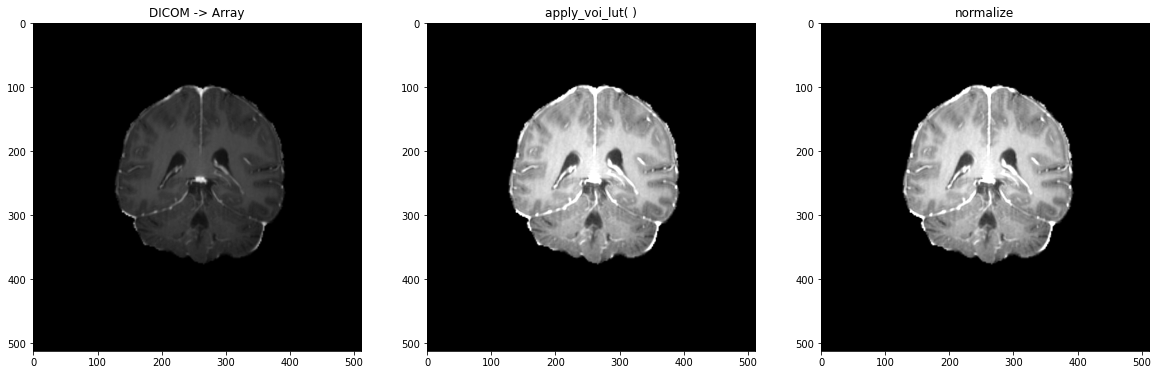

In [94]:
# CT image
dicom_path = './train/00000/T1wCE/Image-50.dcm'
slice = pydicom.read_file(dicom_path)
s = int(slice.RescaleSlope)
b = int(slice.RescaleIntercept)
image = s * slice.pixel_array + b

plt.figure(figsize=(20,20)) 
plt.subplot(1,3,1)
plt.title('DICOM -> Array')
plt.imshow(image, cmap = 'gray')
 
# apply_voi_lut( )

window_center = -500
window_width = 7000

slice.WindowCenter = window_center
slice.WindowWidth = window_width
image2 = apply_voi_lut(image, slice)
plt.subplot(1,3,2)
plt.title('apply_voi_lut( )')
plt.imshow(image2, cmap = 'gray')
 
# normalization
image3 = np.clip(image, window_center - (window_width / 2), window_center + (window_width / 2))
plt.subplot(1,3,3)
plt.title('normalize')
plt.imshow(image3, cmap = 'gray')
 
plt.show()